In [19]:
import pandas as pd
%pylab inline

data = pd.read_csv('data_regression_test.csv',sep=';')
#читаем файл, как разделитель используем ';'
data.head() # первые пять строк

Populating the interactive namespace from numpy and matplotlib


,mag_id,rev_am,org_id,reg_id,district_id,days open,lat,lon,cluster,count,...,cat2_k2,cat3_k2,cat1_k1,cat4_k1,cat2_k1,cat3_k1,cat1_k3,cat4_k3,cat2_k3,cat3_k3
0,1,0.271793,1,1,1,7306,55.653785,37.767043,119,52,...,0.268793,0.294530,0.483861,0.204146,0.314663,0.430373,0.621938,0.290341,0.233704,0.279691
1,3,0.419363,1,1,3,7189,55.720822,37.574640,156,3,...,0.000000,0.000000,0.373951,0.195983,0.485056,0.395880,0.175030,0.130655,0.091180,0.069799
2,4,0.407493,1,1,2,7159,55.639461,37.607063,129,27,...,0.320751,0.296725,0.435382,0.313573,0.347343,0.355943,0.484975,0.313573,0.258315,0.242499
3,5,0.482371,1,1,5,7111,55.816573,37.501706,167,3,...,0.000000,0.000000,0.383203,0.940338,0.371912,0.385952,0.269041,0.940338,0.104867,0.102073
4,6,0.271793,1,1,1,7054,55.663819,37.741978,119,52,...,0.268793,0.294530,0.483861,0.204146,0.314663,0.430373,0.621938,0.290341,0.233704,0.279691


In [20]:
#смотреим на целостность данных
data.info()
data.describe() #детальная статисика для стобцов
(data.duplicated() == True).sum()# Проверка дубликатов в данных
data.isnull().sum() # проверяем, что пропущенных даннх нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 29 columns):
mag_id         376 non-null int64
rev_am         376 non-null float64
org_id         376 non-null int64
reg_id         376 non-null int64
district_id    376 non-null int64
days open      376 non-null int64
lat            376 non-null float64
lon            376 non-null float64
cluster        376 non-null int64
count          376 non-null int64
count_am       376 non-null int64
count_k2       376 non-null int64
count_k1       376 non-null int64
count_k3       376 non-null int64
rev_k2         376 non-null float64
rev_k1         376 non-null float64
rev_k3         376 non-null float64
cat1_k2        376 non-null float64
cat4_k2        376 non-null int64
cat2_k2        376 non-null float64
cat3_k2        376 non-null float64
cat1_k1        376 non-null float64
cat4_k1        376 non-null float64
cat2_k1        376 non-null float64
cat3_k1        376 non-null float64
cat1_k3        376 

mag_id         0
rev_am         0
org_id         0
reg_id         0
district_id    0
days open      0
lat            0
lon            0
cluster        0
count          0
count_am       0
count_k2       0
count_k1       0
count_k3       0
rev_k2         0
rev_k1         0
rev_k3         0
cat1_k2        0
cat4_k2        0
cat2_k2        0
cat3_k2        0
cat1_k1        0
cat4_k1        0
cat2_k1        0
cat3_k1        0
cat1_k3        0
cat4_k3        0
cat2_k3        0
cat3_k3        0
dtype: int64

200

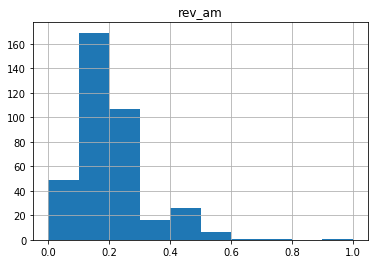

In [21]:
data.hist('rev_am') # посмотрим распределение данных для целевой переменной
len(data['rev_am'].unique()) # какие уникальные значения вообще принимает столбец


Проведем отбор признаков по которым у нас будет идти анализ.
Посмотрим счвязаны ли у нас какие-либо атрибуты.

In [22]:
list(data) # список всех стобцов

['mag_id',
 'rev_am',
 'org_id',
 'reg_id',
 'district_id',
 'days open',
 'lat',
 'lon',
 'cluster',
 'count',
 'count_am',
 'count_k2',
 'count_k1',
 'count_k3',
 'rev_k2',
 'rev_k1',
 'rev_k3',
 'cat1_k2',
 'cat4_k2',
 'cat2_k2',
 'cat3_k2',
 'cat1_k1',
 'cat4_k1',
 'cat2_k1',
 'cat3_k1',
 'cat1_k3',
 'cat4_k3',
 'cat2_k3',
 'cat3_k3']

Посмотрев на данные видим, что таблица сортирована по столбцу 'days open', а 'mag_id' не будет оказывать на прогнозное влияние на 'rev_am'.
Также можно избавиться от 'cat4_k2' т.к. все нули.
Можно заметить, что значения 'count' = 'count_am'+'count_k2'+'count_k1'+'count_k3'.
'lat' и 'lon' являются координатами магазинов и вряд ли будут полезны как признак.
Для остальных стобцов расчитаем коэффиценты корреляции:

In [23]:
#вырезаем стобцы
data = data.drop(['mag_id','cat4_k2','count_am','count_k2','count_k1','count_k3','lat','lon'], axis=1)
data.corr() # Смотрим корреляцию для стобцов

,rev_am,org_id,reg_id,district_id,days open,cluster,count,rev_k2,rev_k1,rev_k3,...,cat2_k2,cat3_k2,cat1_k1,cat4_k1,cat2_k1,cat3_k1,cat1_k3,cat4_k3,cat2_k3,cat3_k3
rev_am,1.000000,-0.438562,-0.551737,-0.451333,0.368643,-0.175102,-0.198364,0.165255,0.258238,0.050950,...,0.132901,0.188557,0.246480,0.289222,0.237696,0.252353,0.272159,0.208586,0.257211,0.295177
org_id,-0.438562,1.000000,0.424849,0.894901,-0.401546,0.284091,0.024185,-0.266295,-0.129676,0.031034,...,-0.257136,-0.286547,-0.147702,-0.202358,-0.099354,-0.132734,-0.189918,-0.150583,-0.243728,-0.268736
reg_id,-0.551737,0.424849,1.000000,0.393626,-0.243370,-0.059185,0.065416,-0.298131,-0.291000,-0.138882,...,-0.273612,-0.313390,-0.278258,-0.215967,-0.283490,-0.307896,-0.348187,-0.134197,-0.395685,-0.415000
district_id,-0.451333,0.894901,0.393626,1.000000,-0.369811,0.338230,0.045436,-0.279683,-0.180792,0.022023,...,-0.266517,-0.301822,-0.198432,-0.244866,-0.143582,-0.184850,-0.239659,-0.192612,-0.280369,-0.311645
days open,0.368643,-0.401546,-0.243370,-0.369811,1.000000,-0.026530,0.155697,0.146030,0.038039,0.071824,...,0.128101,0.163531,0.030982,0.124995,0.040775,0.070372,0.026565,0.060652,0.073967,0.115312
cluster,-0.175102,0.284091,-0.059185,0.338230,-0.026530,1.000000,0.068232,-0.047300,-0.275875,0.044818,...,-0.064548,-0.034091,-0.304418,-0.352038,-0.204913,-0.268723,-0.353027,-0.486402,-0.182743,-0.194311
count,-0.198364,0.024185,0.065416,0.045436,0.155697,0.068232,1.000000,0.243424,-0.085123,0.194949,...,0.247347,0.219805,-0.122074,-0.113446,-0.063098,-0.048437,-0.177315,-0.135601,-0.174561,-0.166507
rev_k2,0.165255,-0.266295,-0.298131,-0.279683,0.146030,-0.047300,0.243424,1.000000,-0.068826,-0.063404,...,0.977030,0.991584,-0.041930,-0.018232,-0.092454,-0.037013,0.361771,-0.109273,0.679855,0.696320
rev_k1,0.258238,-0.129676,-0.291000,-0.180792,0.038039,-0.275875,-0.085123,-0.068826,1.000000,0.074544,...,-0.066203,-0.085619,0.970149,0.732213,0.941973,0.979022,0.674081,0.651740,0.343581,0.336812
rev_k3,0.050950,0.031034,-0.138882,0.022023,0.071824,0.044818,0.194949,-0.063404,0.074544,1.000000,...,-0.055757,-0.068891,0.099485,0.039341,0.032276,0.092162,0.029591,0.069850,-0.075554,-0.066507


Из матрицы можно заметить коррелируют между собой следующие столбцы:
(Значение коэффициента корреляции больше 95%(+-1%))

1. rev_k1 → cat1_k1 → cat2_k1 → cat3_k1
2. rev_k2 → cat1_k2 → cat2_k2 → cat3_k2
3. cat2_k3 → cat3_k3

Теперь смотрим, какие стобцы из коррелирующих оказывают большее влияние на 'rev_am', их оставляем, остальные удаляем.
1. rev_k1
2. cat3_k2
3. cat3_k3

In [24]:
data = data.drop(['cat1_k1','cat2_k1','cat3_k1','cat1_k2','cat2_k2','rev_k2','cat2_k3'], axis=1)
data.corr()
len(list(data)) # с 28 сократили до 13
#data = data.sort_values('rev_am')
data.head(500)


,rev_am,org_id,reg_id,district_id,days open,cluster,count,rev_k1,rev_k3,cat3_k2,cat4_k1,cat1_k3,cat4_k3,cat3_k3
0,0.271793,1,1,1,7306,119,52,0.463816,0.558165,0.294530,0.204146,0.621938,0.290341,0.279691
1,0.419363,1,1,3,7189,156,3,0.468756,0.000000,0.000000,0.195983,0.175030,0.130655,0.069799
2,0.407493,1,1,2,7159,129,27,0.432768,0.561541,0.296725,0.313573,0.484975,0.313573,0.242499
3,0.482371,1,1,5,7111,167,3,0.429428,0.582500,0.000000,0.940338,0.269041,0.940338,0.102073
4,0.271793,1,1,1,7054,119,52,0.463816,0.558165,0.294530,0.204146,0.621938,0.290341,0.279691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0.208788,23,3,41,43,615,5,0.325337,0.445784,0.000000,0.164488,0.293680,0.219317,0.094305
372,0.278802,1,1,5,41,114,8,0.484488,0.000000,0.218728,0.202837,0.264486,0.152127,0.137783
373,0.208788,34,3,52,38,990,5,0.263485,0.427818,0.000000,0.052175,0.155851,0.052175,0.074656
374,0.208788,1,1,2,37,465,11,0.710683,0.886467,0.504307,0.431662,0.976030,0.604326,0.437745


In [25]:
# разделим нашу выборку на сцелевую переменную и признаки
trg = data['rev_am']
trn = data.drop('rev_am', axis=1)
trn.head()
list(trn)

['org_id',
 'reg_id',
 'district_id',
 'days open',
 'cluster',
 'count',
 'rev_k1',
 'rev_k3',
 'cat3_k2',
 'cat4_k1',
 'cat1_k3',
 'cat4_k3',
 'cat3_k3']

In [26]:
import sklearn
from sklearn.model_selection import train_test_split 

# Разобьем наши данные на тестувую обучающую выборки 

Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.2)



строим регрессию для прогнозирования "rev_am"

In [33]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression() # пробуем линейную регрессию
model.fit(Xtrn,Ytrn) #обучаем
model.score(Xtest, Ytest) # Смотрим показатель точности на тестовой выборке


0.4754944768328401

In [129]:
from sklearn.ensemble import RandomForestRegressor # пробуем случайный лес

model = RandomForestRegressor(n_estimators=39, n_jobs=-1) 
model.fit(Xtrn,Ytrn) #обучаем
model.score(Xtest, Ytest)# Смотрим показатель точности на тестовой выборке
   

0.7358586280294048

RandomForestRegressor показала себя лучше чем LinearRegression, при некторых парматрах точность предсказания на тестовой выборке доходила 80%. Не уверен что все признаки правильно подобраны , т.к не знал что именно скрывается под значениями стобцов.
также пробовал логистическую регрессию и метод опорных векторов с линейным ядром, но они тоже не дали высоких результатов.
Можно еще попробовать попробовать перебрать все комбинации столбцов и и для каждой камбинации построить регрессию и посмотреть при какой комбинации будут лучше показатели для тестовой выборки. Но это тоже не дало хороших результатов, т.к это было бы хорошо только для одной тестовой выборки, а при изменении на другую тестувую вборку результаты менялись.